In [ ]:
#COLOR EXTRACTION FROM IMAGE AND IDENTIFY DOMINANT COLOR
#Refrences
#https://pillow.readthedocs.io/en/stable/deprecations.html
#https://convertingcolors.com/rgb-color-1_8_0.html?search=RGB(1,%208,%200)
#https://towardsdatascience.com/image-color-extraction-with-python-in-4-steps-8d9370d9216e
#https://stackoverflow.com/questions/3241929/python-find-dominant-most-common-color-in-an-image

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
import cv2
import extcolors
from PIL import Image, ImageDraw, ImageFont

from colormap import rgb2hex

In [3]:
input_name="F:\image.jpg"
output_width = 900                   
img = Image.open(input_name)
wpercent = (output_width/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((output_width,hsize), Image.Resampling.LANCZOS)

resize_name = 'resize_'+'input_name'  
img.save(input_name) 

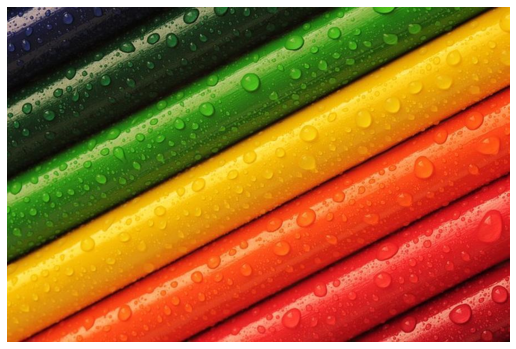

In [4]:
#read
plt.figure(figsize=(9, 9))
img_url = input_name
img = plt.imread(img_url)
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
colors_x = extcolors.extract_from_path(img_url, tolerance = 12, limit = 12)
print(colors_x)

([((209, 33, 18), 83688), ((241, 180, 4), 61429), ((249, 73, 24), 35107), ((16, 16, 18), 33031), ((63, 90, 13), 32801), ((23, 29, 15), 31445), ((222, 148, 13), 28643), ((161, 14, 20), 24632), ((42, 108, 18), 23859), ((50, 137, 20), 21294), ((220, 112, 11), 20695), ((255, 215, 45), 14540)], 540000)


In [6]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color = color_to_df(colors_x)
print(df_color)

     c_code occurence
0   #D12112     83688
1   #F1B404     61429
2   #F94918     35107
3   #101012     33031
4   #3F5A0D     32801
5   #171D0F     31445
6   #DE940D     28643
7   #A10E14     24632
8   #2A6C12     23859
9   #328914     21294
10  #DC700B     20695


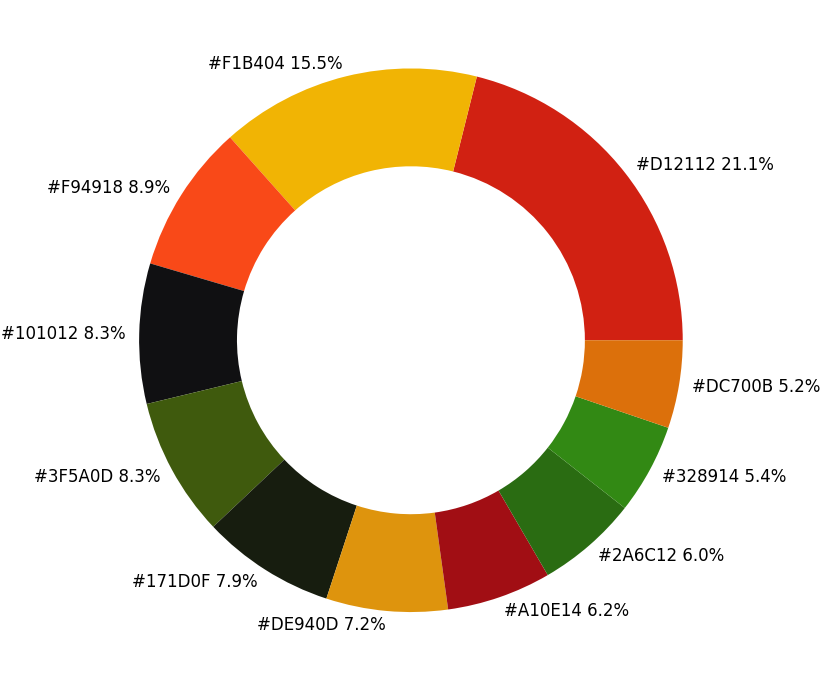

In [7]:
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

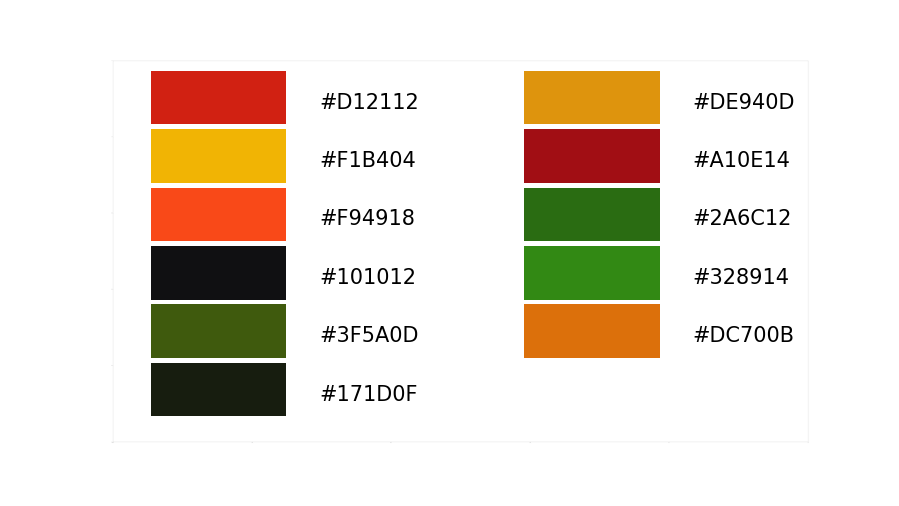

In [8]:
#create background color
fig, ax = plt.subplots(figsize=(192,108),dpi=10)
fig.set_facecolor('white')
plt.savefig('bg.png')
plt.close(fig)

#create color palette
bg = plt.imread('bg.png')
fig = plt.figure(figsize=(90, 90), dpi = 10)
ax = fig.add_subplot(1,1,1)

x_posi, y_posi, y_posi2 = 320, 25, 25
for c in list_color:
    if  list_color.index(c) <= 5:
        y_posi += 125
        rect = patches.Rectangle((x_posi, y_posi), 290, 115, facecolor = c)
        ax.add_patch(rect)
        ax.text(x = x_posi+360, y = y_posi+80, s = c, fontdict={'fontsize': 150})
    else:
        y_posi2 += 125
        rect = patches.Rectangle((x_posi + 800, y_posi2), 290, 115, facecolor = c)
        ax.add_artist(rect)
        ax.text(x = x_posi+1160, y = y_posi2+80, s = c, fontdict={'fontsize': 150})
        
ax.axis('off')
plt.imshow(bg)
plt.tight_layout()

DominantColor
(215, 84, 29)


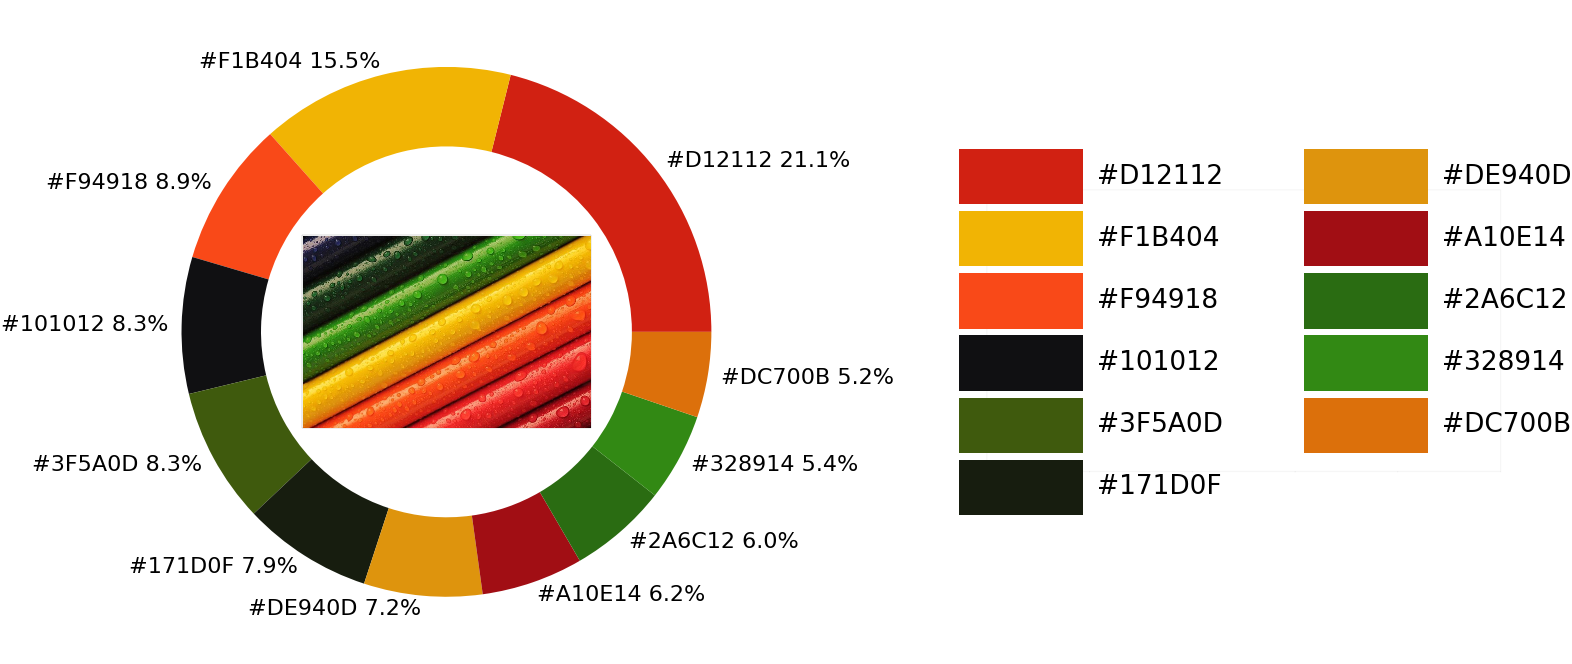

In [9]:
img = mpimg.imread('F:\image.jpg')
bg = plt.imread('bg.png')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(160,120), dpi = 10)

#donut plot
wedges, text = ax1.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 160, 'color':'black'})
plt.setp(wedges, width=0.3)

#add image in the center of donut plot
imagebox = OffsetImage(img, zoom=2.3)
ab = AnnotationBbox(imagebox, (0, 0))
ax1.add_artist(ab)

#color palette
x_posi, y_posi, y_posi2 = 160, -170, -170
for c in list_color:
    if list_color.index(c) <= 5:
        y_posi += 180
        rect = patches.Rectangle((x_posi, y_posi), 360, 160, facecolor = c)
        ax2.add_patch(rect)
        ax2.text(x = x_posi+400, y = y_posi+100, s = c, fontdict={'fontsize': 190})
    else:
        y_posi2 += 180
        rect = patches.Rectangle((x_posi + 1000, y_posi2), 360, 160, facecolor = c)
        ax2.add_artist(rect)
        ax2.text(x = x_posi+1400, y = y_posi2+100, s = c, fontdict={'fontsize': 190})

ax2.axis('off')
fig.set_facecolor('white')
plt.imshow(bg)       
plt.tight_layout()
from colorthief import ColorThief
color_thief = ColorThief('F:/image.jpg')
# get the dominant color
dominant_color = color_thief.get_color(quality=1)
print("DominantColor")
print(dominant_color)

In [29]:
def exact_color(input_image, resize, tolerance, zoom):
    #background
    bg = 'bg.png'
    fig, ax = plt.subplots(figsize=(192,108),dpi=10)
    fig.set_facecolor('white')
    plt.savefig(bg)
    plt.close(fig)
    
    #resize
    output_width = resize
    img = Image.open(input_image)
    if img.size[0] >= resize:
        wpercent = (output_width/float(img.size[0]))
        hsize = int((float(img.size[1])*float(wpercent)))
        img = img.resize((output_width,hsize), Image.Resampling.LANCZOS)
        resize_name = 'resize_'+ input_image
        img.save(resize_name)
    else:
        resize_name = input_image
    
    #crate dataframe
    img_url = resize_name
    colors_x = extcolors.extract_from_path(img_url, tolerance = tolerance, limit = 13)
    df_color = color_to_df(colors_x)
    
    #annotate text
    list_color = list(df_color['c_code'])
    list_precent = [int(i) for i in list(df_color['occurence'])]
    text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color, list_precent)]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(160,120), dpi = 10)
    
    #donut plot
    wedges, text = ax1.pie(list_precent,
                           labels= text_c,
                           labeldistance= 1.05,
                           colors = list_color,
                           textprops={'fontsize': 150, 'color':'black'})
    plt.setp(wedges, width=0.3)

    #add image in the center of donut plot
    img = mpimg.imread(resize_name)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (0, 0))
    ax1.add_artist(ab)
    
    #color palette
    x_posi, y_posi, y_posi2 = 160, -170, -170
    for c in list_color:
        if list_color.index(c) <= 5:
            y_posi += 180
            rect = patches.Rectangle((x_posi, y_posi), 360, 160, facecolor = c)
            ax2.add_patch(rect)
            ax2.text(x = x_posi+400, y = y_posi+100, s = c, fontdict={'fontsize': 190})
        else:
            y_posi2 += 180
            rect = patches.Rectangle((x_posi + 1000, y_posi2), 360, 160, facecolor = c)
            ax2.add_artist(rect)
            ax2.text(x = x_posi+1400, y = y_posi2+100, s = c, fontdict={'fontsize': 190})

    fig.set_facecolor('white')
    ax2.axis('off')
    bg = plt.imread('bg.png')
    plt.imshow(bg)       
    plt.tight_layout()
    return plt.show()

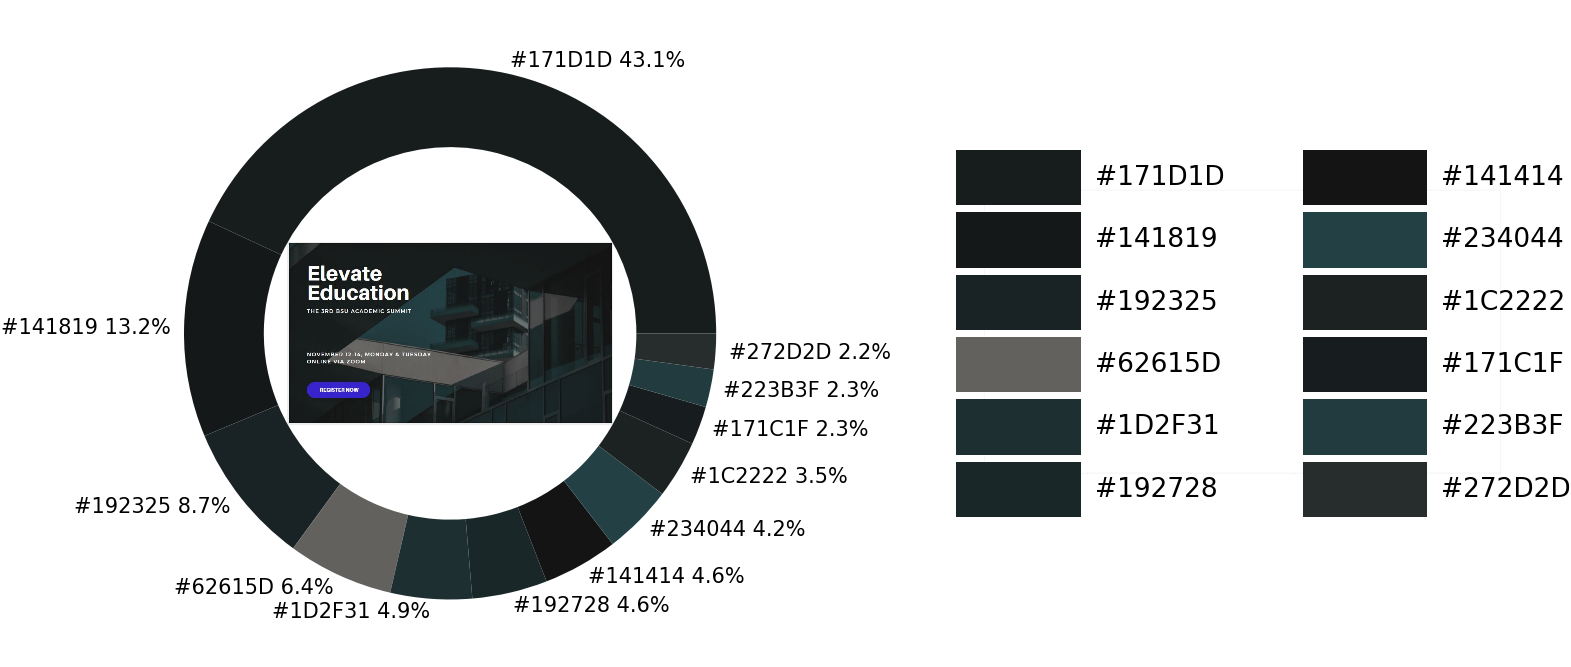

DominantColor
(117, 90, 101)


In [39]:
exact_color('F:/Capture.jpg', 900, 2, 3)
dominant_color = color_thief.get_color(quality=1)
print("DominantColor")
print(dominant_color)

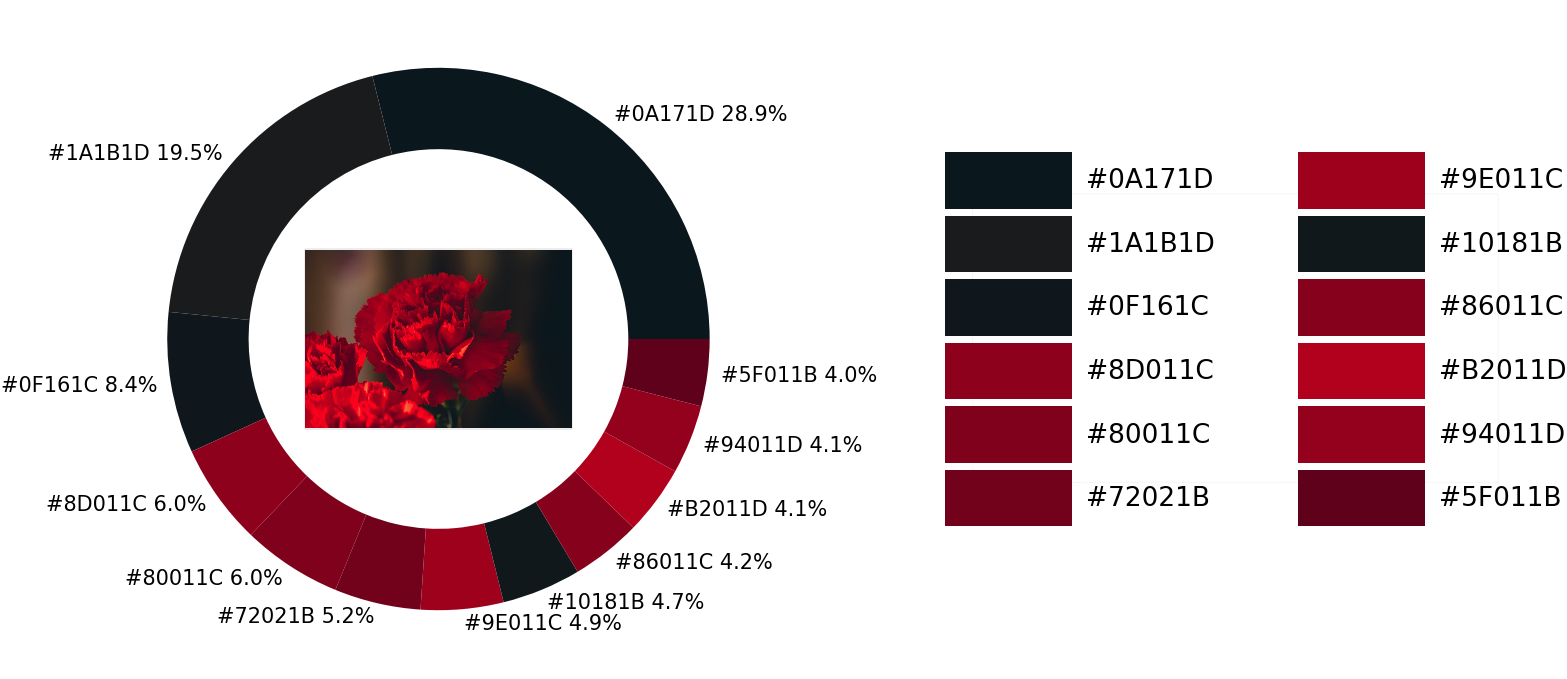

DominantColor
(117, 90, 101)


In [40]:
exact_color('F:/c.jpg', 900, 2, 3)
dominant_color = color_thief.get_color(quality=1)
print("DominantColor")
print(dominant_color)

In [14]:
#Refrences
#https://pillow.readthedocs.io/en/stable/deprecations.html
#https://convertingcolors.com/rgb-color-1_8_0.html?search=RGB(1,%208,%200)
#https://towardsdatascience.com/image-color-extraction-with-python-in-4-steps-8d9370d9216e
#https://stackoverflow.com/questions/3241929/python-find-dominant-most-common-color-in-an-image